# RNN Code Along with Jose

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.randint(1, 11, (5,2))

array([[ 5,  7],
       [ 8,  2],
       [ 5,  6],
       [10,  1],
       [ 9,  3]])

In [6]:
class TimeSeriesData():
    def __init__(self, num_points, xmin, xmax):
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (self.xmax - self.xmin)/num_points
        self.x_data = np.linspace(xmin, xmax, num_points)
        self.y_true = np.sin(self.x_data)
        
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    def next_batch(self, batch_size, steps, return_batch_ts=False):
        # a random starting point for each batch
        rand_start = np.random.rand(batch_size, 1)
        
        # map rand_start onto the xmin~xmax range
        ts_start = rand_start * (self.xmax - self.xmin - (steps * self.resolution))
        
        # 
        batch_ts = ts_start + np.arange(0.0, steps+1) * self.resolution
        
        # 
        y_batch = np.sin(batch_ts)
        
        # Formatting for RNN
        if return_batch_ts:
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1), batch_ts
        else:
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1)

In [7]:
ts_data = TimeSeriesData(250, 0, 10)

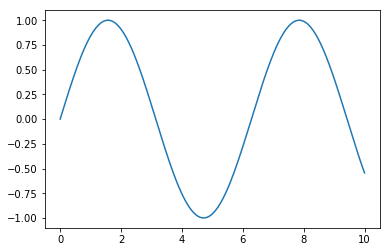

In [8]:
plt.plot(ts_data.x_data, ts_data.y_true)

In [24]:
num_time_steps = 30

In [25]:
y1, y2, ts = ts_data.next_batch(1, num_time_steps, return_batch_ts=True)

In [26]:
ts.flatten()

array([ 8.70937454,  8.74937454,  8.78937454,  8.82937454,  8.86937454,
        8.90937454,  8.94937454,  8.98937454,  9.02937454,  9.06937454,
        9.10937454,  9.14937454,  9.18937454,  9.22937454,  9.26937454,
        9.30937454,  9.34937454,  9.38937454,  9.42937454,  9.46937454,
        9.50937454,  9.54937454,  9.58937454,  9.62937454,  9.66937454,
        9.70937454,  9.74937454,  9.78937454,  9.82937454,  9.86937454,
        9.90937454])

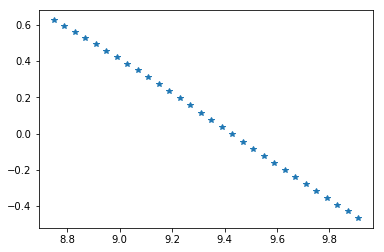

In [27]:
plt.plot(ts.flatten()[1:], y2.flatten(), '*')

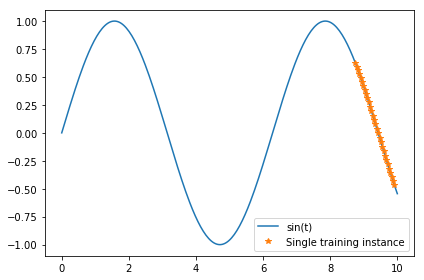

In [30]:
plt.plot(ts_data.x_data, ts_data.y_true, label='sin(t)')
plt.plot(ts.flatten()[1:], y2.flatten(), '*', label='Single training instance')
plt.legend()
plt.tight_layout()

In [31]:
train_inst = np.linspace(5, 5+ts_data.resolution*(num_time_steps+1), num_time_steps+1)